In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot  as plt
from scipy.stats import norm
%matplotlib inline

## NIFTY SIMULATION

In [ ]:
# Download NIFTY data
nifty_data = yf.download('^NSEI', start='2022-01-01', end='2024-03-27')['Adj Close']

print("NIFTY data:")
print(nifty_data.head())

[*********************100%%**********************]  1 of 1 completed

NIFTY data:
Date
2022-01-03    17625.699219
2022-01-04    17805.250000
2022-01-05    17925.250000
2022-01-06    17745.900391
2022-01-07    17812.699219
Name: Adj Close, dtype: float64


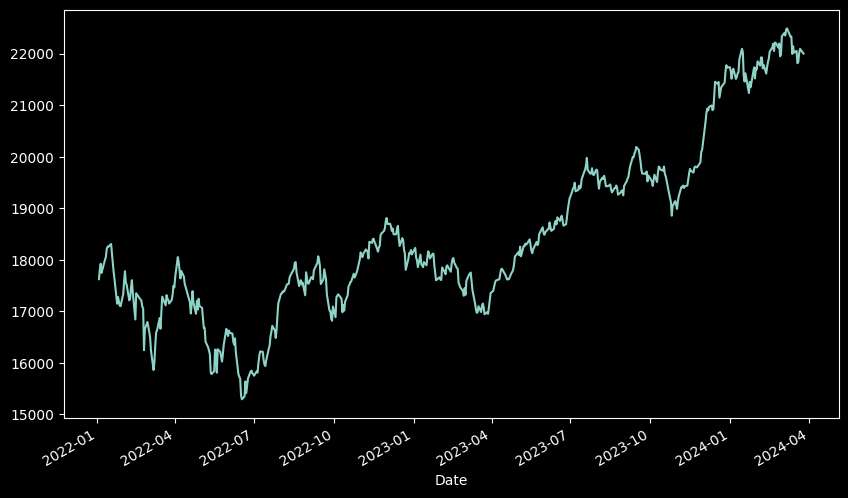

In [ ]:
plt.style.use('dark_background')
nifty_data.plot(figsize = (10,6));

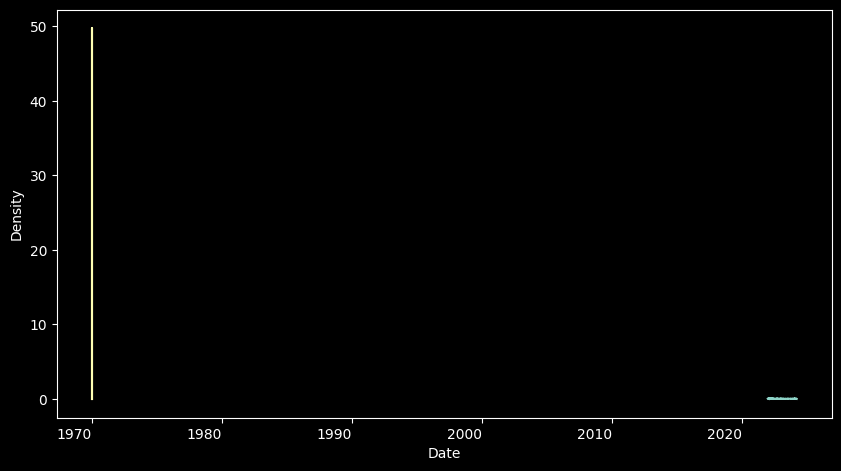

In [ ]:
# Calculate historical log returns
log_returns = np.log(1 + nifty_data.pct_change())

# Show all the log returns
log_returns.plot(figsize = (10,6));

# Show the distribution of the log returns
log_returns.plot.density();

In [ ]:
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

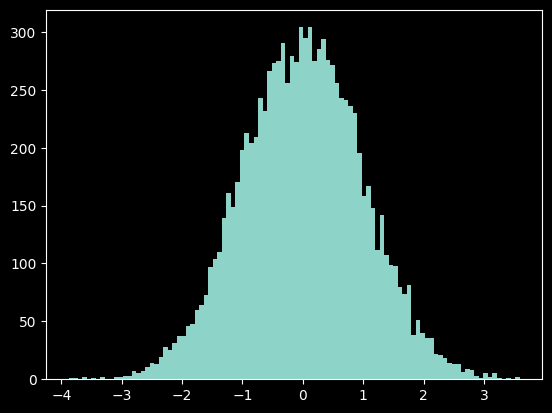

In [ ]:
# Generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)

# Using those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100);

In [ ]:
import numpy as np
from scipy.stats import norm
# Simulate future daily returns using the above method
t_intervals = 250
simulationns = 10000

daily_logreturns_simulated = STD * norm.ppf(np.random.rand(t_intervals, simulationns))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [ ]:
# Calculating future price progression in each simulation using returns

# Latest known stock price for MSFT
last_price  = nifty_data.iloc[-1]

# An array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

price_list

array([[22004.69921875, 22004.69921875, 22004.69921875, ...,
        22004.69921875, 22004.69921875, 22004.69921875],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

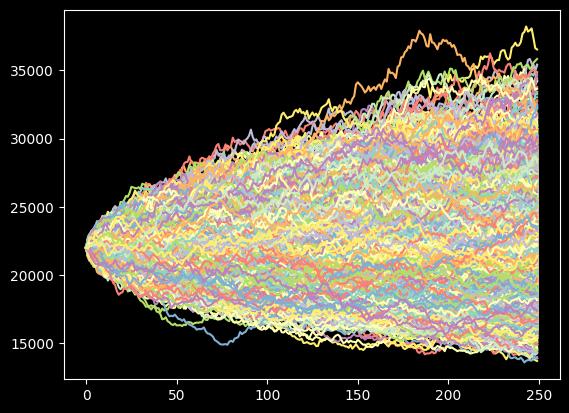

In [ ]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]

# Plot simulated future MSFT prices
plt.plot(price_list);

In [ ]:
# Calculate drift
drift = mean - (0.5*variance)

# Simulate future daily returns
t_intervals = 250
simulationns = 10000

daily_logreturns_simulated = STD * norm.ppf(np.random.rand(t_intervals, simulationns))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

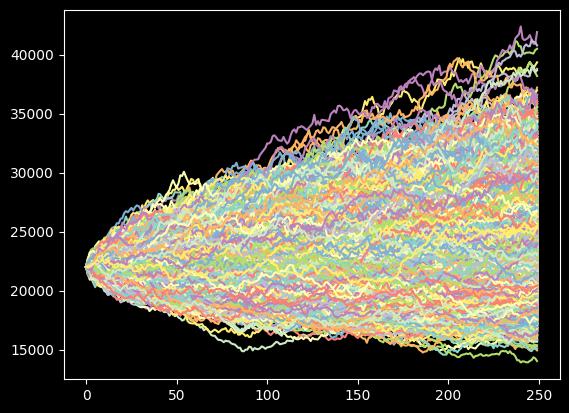

In [ ]:
# Create a variable for the latest price of MSFT
last_price  = nifty_data.iloc[-1]


# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)

# Set the first row to the starting stock price
price_list[0] = last_price

# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated_withdrift[t]


# Plot simulated future MSFT prices
plt.plot(price_list);

In [ ]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(), 2)
AvgSim = round(price_list[-1].mean(), 2)
BestSim = round(price_list[-1].max(), 2)

# Examining the worst, average, and best stock price sceanrios
print('Best and Worst Cases')
print(f'Worst Simulation $/share: {WorstSim}')
print(f'Average Simulation $/share: {AvgSim}')
print(f'BestSimulation $/share: {BestSim}')

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

# Print out the price range within the confidence intervals
print('\n' + 'Confidence Intervals')
print(f'1 Sigma (1 S.D.): 68% confident that price after 250 days will fall between: {round(LowerInterval_1SD, 2)} and {round(UpperInterval_1SD, 2)}')
print(f'2 Sigma (2 S.D.): 95% confident that price after 250 days will fall between: {round(LowerInterval_2SD, 2)} and {round(UpperInterval_2SD, 2)}')

Best and Worst Cases
Worst Simulation $/share: 14024.78
Average Simulation $/share: 24327.56
BestSimulation $/share: 41907.16

Confidence Intervals
1 Sigma (1 S.D.): 68% confident that price after 250 days will fall between: 20951.55 and 27703.57
2 Sigma (2 S.D.): 95% confident that price after 250 days will fall between: 17575.54 and 31079.58


## SENSEX SIMULATION

In [ ]:
# Download Sensex data
sensex_data = yf.download('^BSESN', start='2022-01-01', end='2024-03-27')['Adj Close']
print("\nSensex data:")
print(sensex_data.head())

[*********************100%%**********************]  1 of 1 completed


Sensex data:
Date
2022-01-03    59183.218750
2022-01-04    59855.929688
2022-01-05    60223.148438
2022-01-06    59601.839844
2022-01-07    59744.648438
Name: Adj Close, dtype: float64


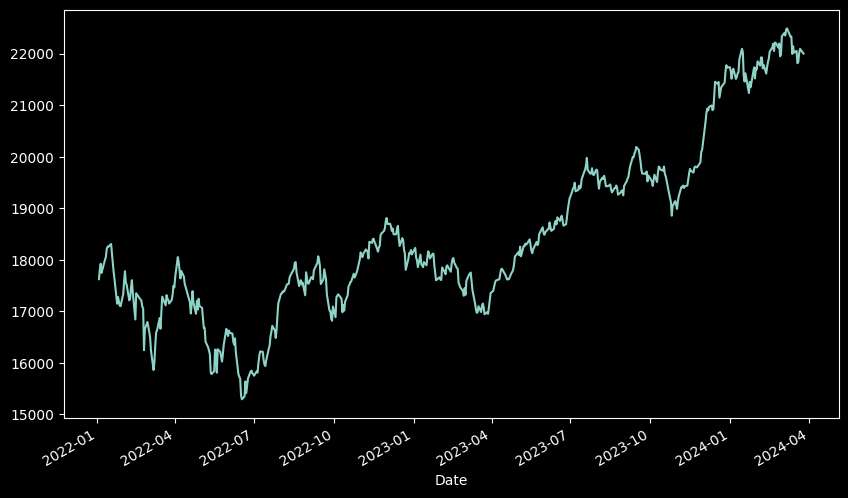

In [ ]:
plt.style.use('dark_background')
nifty_data.plot(figsize = (10,6));

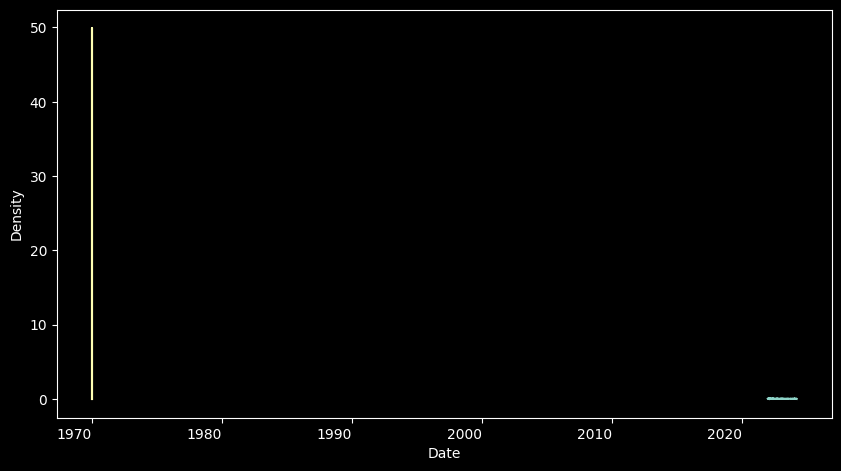

In [ ]:
# Calculate historical log returns
log_returns = np.log(1 + sensex_data.pct_change())

# Show all the log returns
log_returns.plot(figsize = (10,6));

# Show the distribution of the log returns
log_returns.plot.density();

In [ ]:
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()

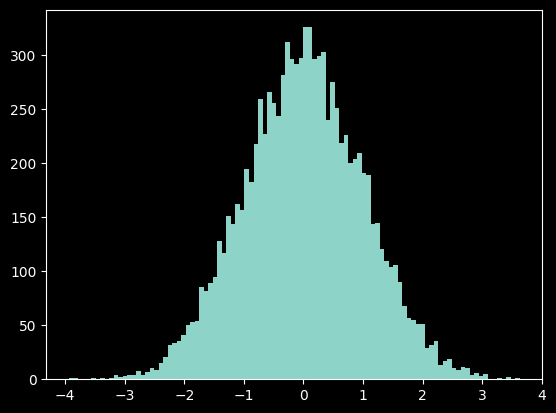

In [ ]:
# Generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)

# Using those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100);

In [ ]:
# Simulate future daily returns using the above method
t_intervals = 250
simulationns = 10000

daily_logreturns_simulated = STD * norm.ppf(np.random.rand(t_intervals, simulationns))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [ ]:
# Calculating future price progression in each simulation using returns

# Latest known stock price for MSFT
last_price  = sensex_data.iloc[-1]

# An array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

price_list

array([[72470.296875, 72470.296875, 72470.296875, ..., 72470.296875,
        72470.296875, 72470.296875],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       ...,
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      , ...,     0.      ,
            0.      ,     0.      ]])

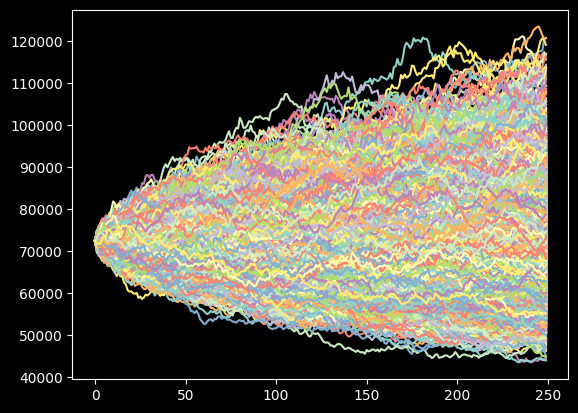

In [ ]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]

# Plot simulated future MSFT prices
plt.plot(price_list);

In [ ]:
# Calculate drift
drift = mean - (0.5*variance)

# Simulate future daily returns
t_intervals = 250
simulationns = 10000

daily_logreturns_simulated = STD * norm.ppf(np.random.rand(t_intervals, simulationns))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated + drift
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

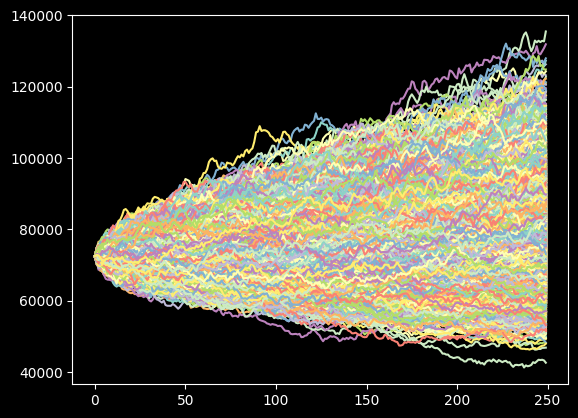

In [ ]:
# Create a variable for the latest price of MSFT
last_price  = sensex_data.iloc[-1]


# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)

# Set the first row to the starting stock price
price_list[0] = last_price

# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_simplereturns_simulated_withdrift[t]


# Plot simulated future MSFT prices
plt.plot(price_list);

In [ ]:
# Calculate worst, avg and best scenarios
WorstSim = round(price_list[-1].min(), 2)
AvgSim = round(price_list[-1].mean(), 2)
BestSim = round(price_list[-1].max(), 2)

# Examining the worst, average, and best stock price sceanrios
print('Best and Worst Cases')
print(f'Worst Simulation $/share: {WorstSim}')
print(f'Average Simulation $/share: {AvgSim}')
print(f'BestSimulation $/share: {BestSim}')

# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

# Print out the price range within the confidence intervals
print('\n' + 'Confidence Intervals')
print(f'1 Sigma (1 S.D.): 68% confident that Sensex price after 250 days will fall between: {round(LowerInterval_1SD, 2)} and {round(UpperInterval_1SD, 2)}')
print(f'2 Sigma (2 S.D.): 95% confident that Sensex price after 250 days will fall between: {round(LowerInterval_2SD, 2)} and {round(UpperInterval_2SD, 2)}')

Best and Worst Cases
Worst Simulation $/share: 42604.58
Average Simulation $/share: 79565.17
BestSimulation $/share: 135458.02

Confidence Intervals
1 Sigma (1 S.D.): 68% confident that Sensex price after 250 days will fall between: 68372.19 and 90758.15
2 Sigma (2 S.D.): 95% confident that Sensex price after 250 days will fall between: 57179.2 and 101951.14


## CORRELATION BETWEEN NIFTY AND SENSEX

In [ ]:
nifty = yf.download('^NSEI', start='2022-01-01', end='2024-03-27')
sensex = yf.download('^BSESN', start='2022-01-01', end='2024-03-27')
# print('\n')
# print(nifty_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
list=[sensex,nifty]
for i in list:
    i.drop('Volume',axis=1,inplace=True)
    print(i)

                    Open          High           Low         Close  \
Date                                                                 
2022-01-03  58310.089844  59266.390625  58306.449219  59183.218750   
2022-01-04  59343.789062  59937.328125  59084.398438  59855.929688   
2022-01-05  59921.980469  60332.718750  59661.378906  60223.148438   
2022-01-06  59731.750000  59781.859375  59290.578125  59601.839844   
2022-01-07  59776.101562  60130.179688  59401.441406  59744.648438   
...                  ...           ...           ...           ...   
2024-03-19  72462.937500  72490.093750  71933.351562  72012.046875   
2024-03-20  72036.859375  72402.671875  71674.421875  72101.687500   
2024-03-21  72507.359375  72882.460938  72416.031250  72641.187500   
2024-03-22  72231.656250  73115.617188  72172.093750  72831.937500   
2024-03-26  72396.968750  72705.289062  72363.031250  72470.296875   

               Adj Close  
Date                      
2022-01-03  59183.218750  
2022-01-

In [ ]:
fin_df = [sensex,nifty]
for i in fin_df:
    i['Difference'] = (i['Open']-i['Close'])/i['Open']*100
    i.drop(['Open','High','Close','Low','Adj Close'],axis=1,inplace=True)
    print(i)

            Difference
Date                  
2022-01-03   -1.497389
2022-01-04   -0.863006
2022-01-05   -0.502600
2022-01-06    0.217489
2022-01-07    0.052618
...                ...
2024-03-19    0.622236
2024-03-20   -0.089993
2024-03-21   -0.184572
2024-03-22   -0.831050
2024-03-26   -0.101286

[550 rows x 1 columns]
            Difference
Date                  
2022-01-03   -1.371983
2022-01-04   -0.700451
2022-01-05   -0.590066
2022-01-06    0.127189
2022-01-07   -0.084841
...                ...
2024-03-19    0.587794
2024-03-20    0.021978
2024-03-21   -0.100268
2024-03-22   -0.750270
2024-03-26   -0.258789

[551 rows x 1 columns]


In [ ]:
concat_df = pd.concat(fin_df, axis=1, ignore_index=True)
concat_df

,0,1
Date,,
2022-01-03,-1.497389,-1.371983
2022-01-04,-0.863006,-0.700451
2022-01-05,-0.502600,-0.590066
2022-01-06,0.217489,0.127189
2022-01-07,0.052618,-0.084841
...,...,...
2024-03-19,0.622236,0.587794
2024-03-20,-0.089993,0.021978
2024-03-21,-0.184572,-0.100268


In [ ]:
new_col_name = {0:'Sensex', 1:'Nifty'}
concat_df.rename(columns=new_col_name, inplace=True)
concat_df

,Sensex,Nifty
Date,,
2022-01-03,-1.497389,-1.371983
2022-01-04,-0.863006,-0.700451
2022-01-05,-0.502600,-0.590066
2022-01-06,0.217489,0.127189
2022-01-07,0.052618,-0.084841
...,...,...
2024-03-19,0.622236,0.587794
2024-03-20,-0.089993,0.021978
2024-03-21,-0.184572,-0.100268


In [ ]:
concat_df.isnull().sum()

Sensex    1
Nifty     0
dtype: int64

In [ ]:
concat_df.dropna(axis=0,inplace = True)
concat_df

,Sensex,Nifty
Date,,
2022-01-03,-1.497389,-1.371983
2022-01-04,-0.863006,-0.700451
2022-01-05,-0.502600,-0.590066
2022-01-06,0.217489,0.127189
2022-01-07,0.052618,-0.084841
...,...,...
2024-03-19,0.622236,0.587794
2024-03-20,-0.089993,0.021978
2024-03-21,-0.184572,-0.100268


In [ ]:
concat_df.describe()

,Sensex,Nifty
count,550.000000,550.000000
mean,0.010577,0.032384
std,0.706019,0.688095
min,-2.486257,-2.475598
25%,-0.409863,-0.381321
50%,-0.013956,-0.003472
75%,0.433297,0.436899
max,2.872788,2.979048


In [ ]:
concat_df.corr()

,Sensex,Nifty
Sensex,1.000000,0.978871
Nifty,0.978871,1.000000


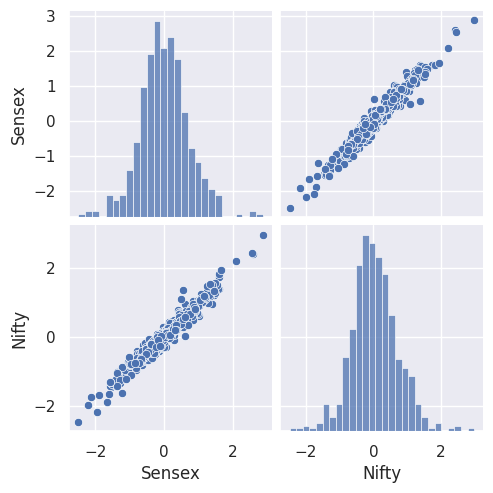

In [ ]:
import seaborn as sns
sns.set(font_scale=1)
sns.pairplot(data=concat_df)
plt.show()

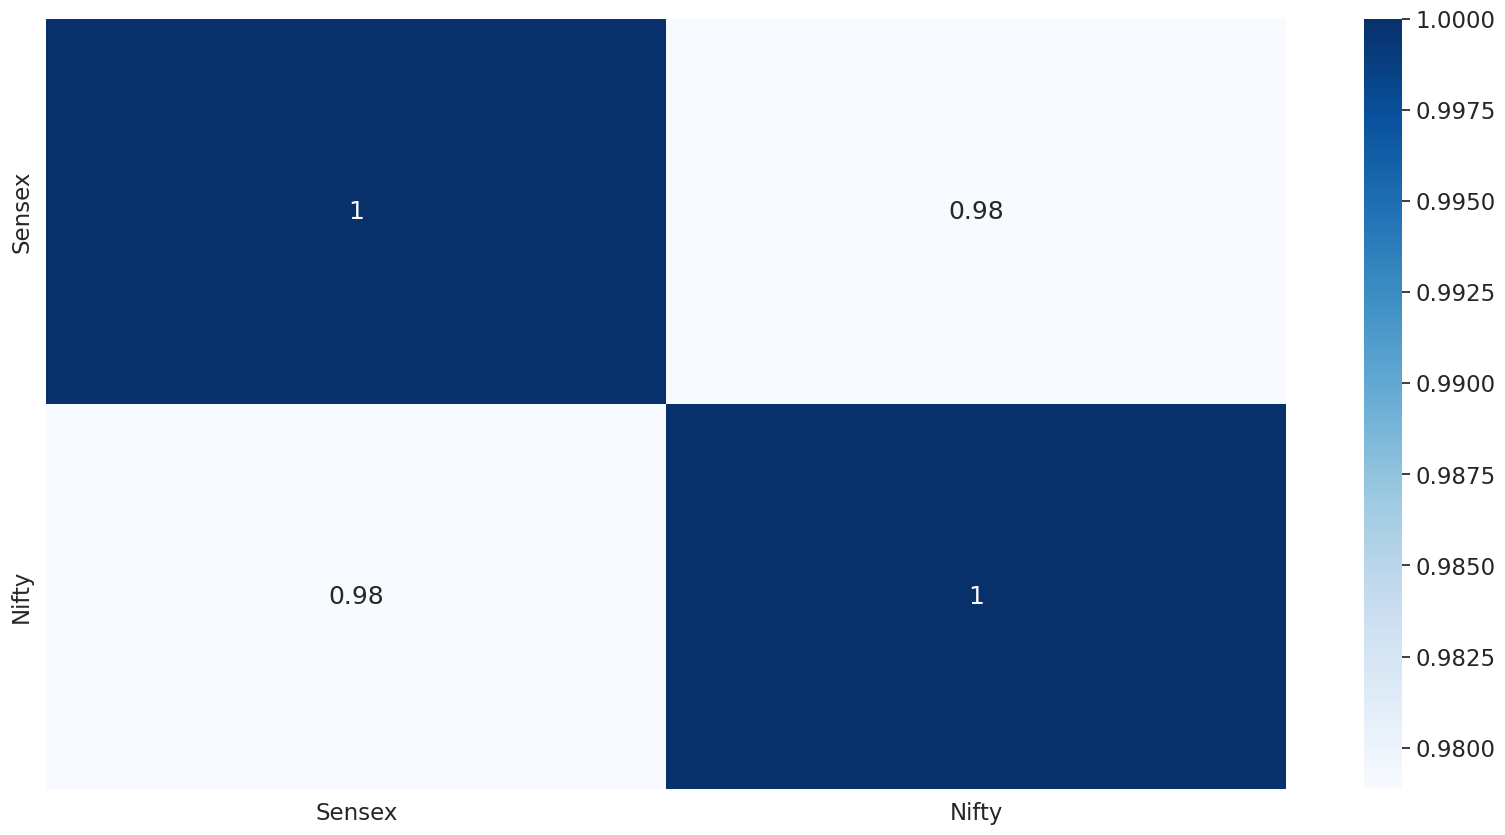

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.heatmap(data=concat_df.corr(),cmap="Blues",annot=True)
plt.show()